In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from PIL import Image

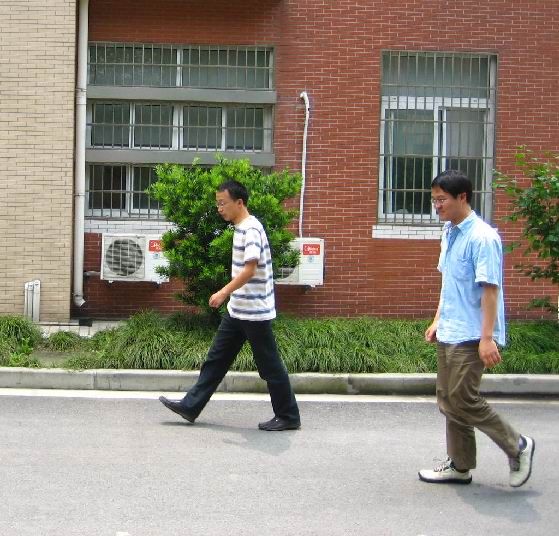

In [2]:
image = Image.open('seg1.png')
display(image)

In [4]:
image_array =np.array(image)

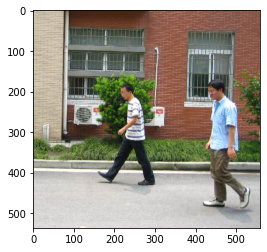

In [6]:
plt.imshow(image_array)

In [9]:
from torchvision import models
fcn = models.segmentation.fcn_resnet101(pretrained=True).eval()

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /Users/varun/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth


Downloading: "https://download.pytorch.org/models/fcn_resnet101_coco-7ecb50ca.pth" to /Users/varun/.cache/torch/checkpoints/fcn_resnet101_coco-7ecb50ca.pth


In [11]:
import torchvision.transforms as T

In [12]:
trf = T.Compose([T.Resize(256),
                 T.CenterCrop(224),
                 T.ToTensor(), 
                 T.Normalize(mean = [0.485, 0.456, 0.406], 
                             std = [0.229, 0.224, 0.225])])

In [17]:
inp = trf(image).unsqueeze(0)

In [18]:
inp.shape

torch.Size([1, 3, 224, 224])

In [19]:
out_image = fcn(inp)['out']

In [23]:
out_img = torch.argmax(out_image.squeeze(), dim=0).detach().cpu().numpy()

In [24]:
out_img.shape

(224, 224)

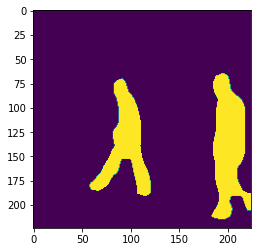

In [26]:
plt.imshow(out_img)

In [93]:
def segment_image(net,img):
    
    trf = T.Compose([T.Resize(256),
                 T.ToTensor(), 
                 T.Normalize(mean = [0.485, 0.456, 0.406], 
                             std = [0.229, 0.224, 0.225])])
    inp = trf(img).unsqueeze(0)
    out_image = net(inp)['out']
    out_img = torch.argmax(out_image.squeeze(), dim=0).detach().cpu().numpy()
    return out_img

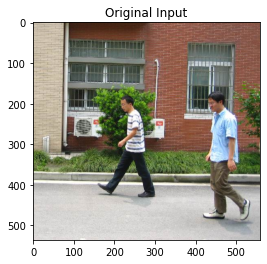

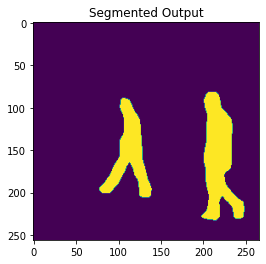

In [94]:
image = Image.open('seg1.png')
plt.imshow(image)
plt.title("Original Input")
output = segment_image(fcn,image)
plt.figure()
plt.title("Segmented Output")
plt.imshow(output)

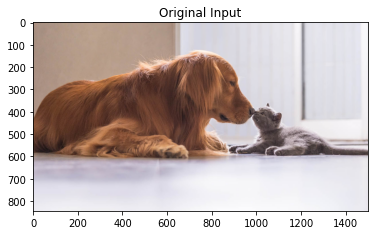

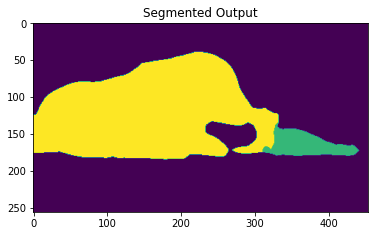

In [95]:
image = Image.open('seg2.jpg')
plt.imshow(image)
plt.title("Original Input")
output = segment_image(fcn,image)
plt.figure()
plt.title("Segmented Output")
plt.imshow(output)

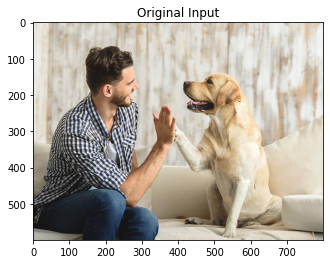

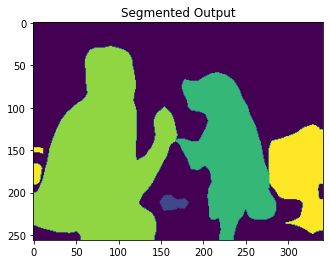

In [96]:
image = Image.open('seg3.jpg')
plt.imshow(image)
plt.title("Original Input")
output = segment_image(fcn,image)
plt.figure()
plt.title("Segmented Output")
plt.imshow(output)

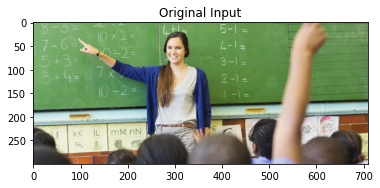

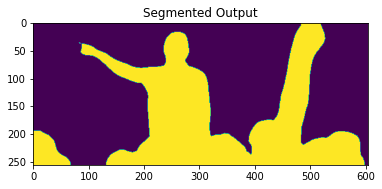

In [97]:
image = Image.open('seg4.jpg')
plt.imshow(image)
plt.title("Original Input")
output = segment_image(fcn,image)
plt.figure()
plt.title("Segmented Output")
plt.imshow(output)

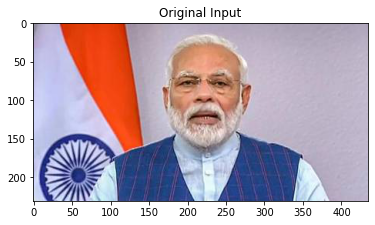

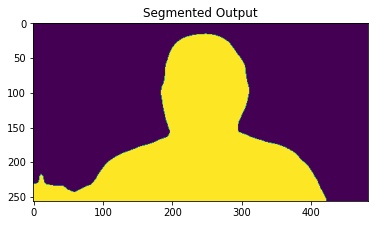

In [98]:
image = Image.open('seg5.jpeg')
plt.imshow(image)
plt.title("Original Input")
output = segment_image(fcn,image)
plt.figure()
plt.title("Segmented Output")
plt.imshow(output)